## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

## WeatherPy

In [55]:
#Dependencies
from config import api_key
from citipy import citipy

import random
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import csv

#plt.style.use("seaborn")

## Generate Cities List

In [56]:
#Set Latitudes and Longitudes
latitudes = np.linspace(-89, 89, num=1200)
print(len(latitudes))

1200


In [57]:
longitudes = np.random.uniform(low=-120, high=120, size=(1200,))
print(len(longitudes))

1200


In [58]:
locations = np.column_stack((latitudes, longitudes))
print(len(locations))

1200


In [59]:
cities_df = pd.DataFrame(locations, columns=['Lat', 'Lng'])
cities_df.head()

,Lat,Lng
0,-89.000000,114.666322
1,-88.851543,-77.497098
2,-88.703086,-33.937222
3,-88.554629,9.173095
4,-88.406172,7.174989


In [60]:
cities_df['City Name'] = ''
for index, row in cities_df.iterrows():
    city = citipy.nearest_city(row['Lat'], row['Lng'])
    cities_df.loc[index, 'City Name'] = city.city_name   
        
cities_df.head()       

,Lat,Lng,City Name
0,-89.000000,114.666322,albany
1,-88.851543,-77.497098,ushuaia
2,-88.703086,-33.937222,ushuaia
3,-88.554629,9.173095,hermanus
4,-88.406172,7.174989,hermanus


In [61]:
#get rid of duplicate cities
cities_df.drop_duplicates(subset='City Name', keep="first", inplace=True)  # 538 rows × 3 columns
cities_df =  cities_df.sample(500) 
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,Lat,Lng,City Name
0,8.833194,43.048959,jijiga
1,9.278565,48.754800,garowe
2,4.973311,-82.366271,la palma
3,-8.833194,-72.771191,porto walter
4,50.104254,89.340058,kosh-agach


## Perform API Calls


In [62]:
#Add columns to cities_df
cities_df['Temperature'] = ''
cities_df['Humidity'] = ''
cities_df['Cloudiness'] = ''
cities_df['WindSpeed'] = ''

cities_df = cities_df[['City Name', 'Lat' ,'Lng', 'Temperature', 'Humidity','Cloudiness', 'WindSpeed']]
cities_df = cities_df.reset_index(drop=True)
cities_df.head()

,City Name,Lat,Lng,Temperature,Humidity,Cloudiness,WindSpeed
0,jijiga,8.833194,43.048959,,,,
1,garowe,9.278565,48.754800,,,,
2,la palma,4.973311,-82.366271,,,,
3,porto walter,-8.833194,-72.771191,,,,
4,kosh-agach,50.104254,89.340058,,,,


In [63]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#params = {'appid' : api_key, 'inits' : 'metric'}
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through cities and get weather data
for index, row in cities_df.iterrows():
    print(f"Weather Data for citi: {row['City Name']}, at index: {index}")
    print("Requested URL: " + (query_url + row['City Name']))
    response = requests.get(query_url + row['City Name']).json()
          
    if response['cod'] == 200: 
          print(response['cod'])
          cities_df.loc[index, 'Temperature'] = response['main']['temp']
          cities_df.loc[index, 'Humidity'] = response['main']['humidity']
          cities_df.loc[index, 'Cloudiness'] = response['clouds']['all'] 
          cities_df.loc[index, 'WindSpeed'] = response['wind']['speed']                                   
    else:
          
          continue
                                                                                       

Weather Data for citi: jijiga, at index: 0
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a4546d4009a9aef9b16ffc3&units=metric&q=jijiga
200
Weather Data for citi: garowe, at index: 1
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a4546d4009a9aef9b16ffc3&units=metric&q=garowe
200
Weather Data for citi: la palma, at index: 2
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a4546d4009a9aef9b16ffc3&units=metric&q=la palma
200
Weather Data for citi: porto walter, at index: 3
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a4546d4009a9aef9b16ffc3&units=metric&q=porto walter
200
Weather Data for citi: kosh-agach, at index: 4
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a4546d4009a9aef9b16ffc3&units=metric&q=kosh-agach
200
Weather Data for citi: vanavara, at index: 5
Requested URL: http://api.openweathermap.org/data/2.5/weather?appid=6b4537a96a454

In [64]:
#Drop cities with missing information
filter = cities_df['Temperature'] != ''
cities_df = cities_df[filter]
cities_df.head()

,City Name,Lat,Lng,Temperature,Humidity,Cloudiness,WindSpeed
0,jijiga,8.833194,43.048959,8.74,53,0,1.2
1,garowe,9.278565,48.754800,18.09,84,0,2.9
2,la palma,4.973311,-82.366271,20.04,99,12,0.35
3,porto walter,-8.833194,-72.771191,26.54,82,8,0.25
4,kosh-agach,50.104254,89.340058,-16.82,61,0,1.15


In [65]:
#Save to CSV
cities_df.to_csv("Cties Weather for 03-20-2018.csv")

## Temperature (F) vs. Latitude Plot

<function matplotlib.pyplot.show>

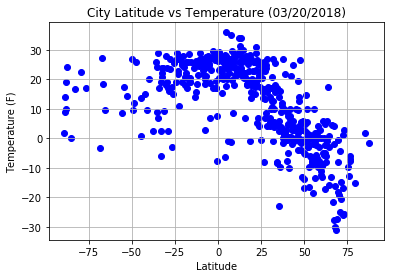

In [66]:
x_axis = cities_df['Lat']
data =  cities_df['Temperature']

plt.scatter(x_axis, data, color='blue')
plt.title("City Latitude vs Temperature (03/20/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.savefig("city_temp.png")
plt.show


## Latitude vs Humidity Plot

<function matplotlib.pyplot.show>

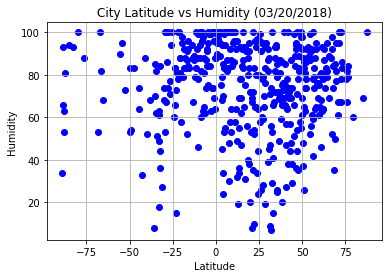

In [67]:
x_axis = cities_df['Lat']
data =  cities_df['Humidity']

plt.scatter(x_axis, data, color='blue')
plt.title("City Latitude vs Humidity (03/20/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("city_humidity.png")
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show>

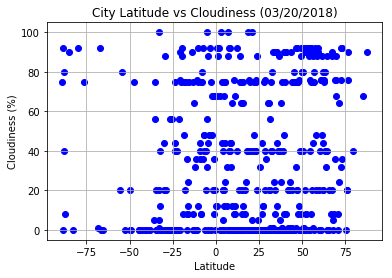

In [68]:
x_axis = cities_df['Lat']
data =  cities_df['Cloudiness']

plt.scatter(x_axis, data, color='blue')
plt.title("City Latitude vs Cloudiness (03/20/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("city_cloudiness.png")
plt.show

## Latitude vs Windspeed Plot

<function matplotlib.pyplot.show>

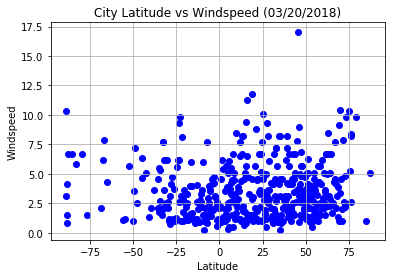

In [69]:
x_axis = cities_df['Lat']
data =  cities_df['WindSpeed']

plt.scatter(x_axis, data, color='blue')
plt.title("City Latitude vs Windspeed (03/20/2018)")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid()
plt.savefig("city_windspeed.png")
plt.show

* From the data and graphs above we can conlude that temperature gets hotter as it approaches the equator